# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Yestika Dian Wulandari
- **Email:** ystkdian@gmail.com | a009xbf506@devacademy.id
- **ID Dicoding:** ystkdian

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren penggunaan layanan *bike sharing* dari tahun 2011-2012?
2. Pada hari apa sepeda paling banyak dan paling sedikit digunakan?
3. Pada jam berapa sepeda paling banyak dan paling sedikit digunakan?
4. Pada musim apa sepeda paling banyak dan paling sedikit digunakan?
5. Bagaimana perbedaan penggunaan layanan pada pengguna *casual* dan *registered*?

## Import Semua Packages/Library yang Digunakan

Hal pertama yang harus dilakukan adalah melakukan import library/packages yang dibutuhkan dalam proses analisis.

In [1]:
# Mengimpor library/packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
from zipfile import ZipFile
import os
import glob

## Data Wrangling

### Gathering Data

Tahap pertama dalam proses data wrangling adalah pengumpulan data. Data yang digunakan pada proyek ini akan diambil dari Google Drive yang telah disediakan oleh Dicoding. Secara garis besar, proses yang akan dilakukan pada tahap pengumpulan data adalah sebagai berikut:
1. Mengunduh dataset dari Google Drive ke direktori proyek menggunakan gdown.
2. Melakukan ekstraksi file yang telah diunduh ke folder output menggunakan zipfile.
3. Menghapus file .zip yang telah diekstraksi.
4. Memuat tabel ke dalam DataFrame.

In [2]:
# Mengunduh dataset
url = 'https://drive.google.com/file/d/1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ/edit'
downloaded_dataset = 'bike-sharing.zip'

gdown.download(url, downloaded_dataset, fuzzy=True)

print("Download completed.")

# Membuat direktori `data` untuk menampung dataset yang akan diekstraksi
extracted_folder = 'data/'

if not os.path.exists(extracted_folder):
    os.makedirs(extracted_folder)

# Mengekstraksi file ke folder `data`
with ZipFile(downloaded_dataset, 'r') as myzip:
    myzip.extractall(extracted_folder)

print("Extraction completed.")

# Menghapus file zip dataset
os.remove(downloaded_dataset)

print("Zip file successfully deleted.")

Downloading...
From: https://drive.google.com/uc?id=1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ
To: C:\Users\ystkd\submission_analisis_data\bike-sharing.zip
100%|████████████████████████████████████████████████████████████████████████████████| 280k/280k [00:01<00:00, 176kB/s]

Download completed.
Extraction completed.
Zip file successfully deleted.


In [3]:
# Melihat file .csv yang ada pada folder `data`
path = 'data'
files = glob.glob(path + "/*.csv") 
print(files)

['data\\day.csv', 'data\\hour.csv']


Terdapat dua file .csv dari dataset, yaitu `day.csv` dan `hour.csv`. Keduanya akan dimuat ke dalam dua dataframe berbeda, yaitu `day_df` dan `hour_df`.

In [4]:
# Memuat data `day.csv`
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
# Memuat data `hour.csv`
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**- Insights -**
<br>Jika melihat sekilas dari tabel `day_df` dan `hour_df` ada beberapa perubahan yang sepertinya harus dilakukan, seperti mengubah nama kolom dan tipe datanya.

### Assessing Data

Sebelum dapat dieksplorasi, harus dipastikan data memiliki kualitas yang baik. Pada tahap assessing data, dilakukan penilaian terhadap data untuk melihat permasalahan yang ada pada data yang digunakan. Beberapa hal yang akan dilihat, antara lain:
- Kesesuaian tipe data
- Ada tidaknya *missing value*
- Ada tidaknya *duplicate value*
- Ada tidaknya *innacurate value*

Untuk mempermudah proses pengecekan, akan dibuat sebuah fungsi bernama `assess_data`.

In [6]:
# Membuat fungsi `assess_data` 
def assess_data(df):
    
    # Memeriksa kesesuaian tipe data melalui method .info()
    print("\nTable Info\n")
    df.info()
    print("-" * 50)
    
    # Memeriksa missing value
    print("\nMissing Values\n")
    print(df.isna().sum())
    print("-" * 50)
    
    # Memeriksa duplicate value
    print("\nJumlah data duplikat: ", df.duplicated().sum(), "\n")
    print("-" * 50)

    # Memeriksa innacurate value
    print("\nDeskripsi Statistik Tabel\n")
    print(df.describe())

#### Menilai data `day_df`

In [7]:
assess_data(day_df)


Table Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
--------------------------------------------------

Missing Values

instant     

**- Insights -**
<br>**Penilaian terhadap tabel `day_df`**
1. Beberapa tipe data pada tabel `day_df` perlu dilakukan penyesuaian, antara lain:
   - Mengubah nama kolom **dteday, yr, mnth, weekday, weathersit,** dan **cnt**.
   - Mengubah tipe data kolom **dteday** dari `object` menjadi `datetime`.
   - Mengubah data pada kolom **season, yr, mnth, weekday, workingday,** dan **weathersit** dari `int` menjadi `category`.
2. Tidak ada missing value dan data duplikat dari tabel.
3. Tidak ada nilai yang terlihat janggal dari data.
4. Jumlah data adalah **731** dengan **16 kolom**.

#### Menilai data `hour_df`

In [8]:
assess_data(hour_df)


Table Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
------------------------------------

**- Insights -**
<br>**Penilaian terhadap tabel `hours_df`**
1. Karena hampir keseluruhan kolom pada `hours_df` sama dengan `day_df` maka perubahan yang perlu dilakukan kurang lebih sama, yaitu:
   - Mengubah nama kolom **dteday, yr, mnth, hr, weekday, weathersit,** dan **cnt**.
   - Mengubah tipe data kolom **dteday** dari `object` menjadi `datetime`.
   - Mengubah data pada kolom **season, yr, mnth, weekday, workingday,** dan **weathersit** dari `int` menjadi `category`.
2. Tidak ada missing value dan data duplikat dari tabel.
3. Tidak ada nilai yang terlihat janggal dari data.
4. Jumlah data adalah **17.379** dengan **17 kolom**.

### Cleaning Data

Pada tahap pembersihan data, akan dilakukan beberapa proses:
1. Mengganti nama beberapa kolom sehingga lebih mudah dibaca
2. Mengganti tipe data pada beberapa kolom
3. Menghapus kolom yang tidak akan digunakan untuk menjawab pertanyaan yang sebelumnya telah dibuat

Karena kedua tabel memiliki atribut yang hampir keseluruhan sama, maka akan dibuat sebuah fungsi untuk menangani proses pembersihan.

In [10]:
def cleaning(df):
    # Mengganti nama kolom
    df.rename(columns={
        'dteday': 'date',
        'yr': 'year',
        'hr': 'hour',
        'mnth': 'month',
        'weekday': 'day',
        'weathersit': 'weather',
        'cnt': 'total'
    }, inplace=True)

    # Mengubah tipe data kolom `date`
    df['date'] = pd.to_datetime(df['date'])

    # Mengubah tipe data kolom `season`, `year`, `month`, `holiday`, `day`, `workingday`, dan `weather`
    df['season'] = df['season'].map({
        1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
    })

    df['year'] = df['year'].map({
        0: '2011', 1: '2012'
    })

    df['month'] = df['month'].map({
        1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
        7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
    })

    df['day'] = df['day'].map({
        0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
    })

    df['workingday'] = df['workingday'].map({
        0: 'Weekend/Holiday', 1: 'Working Day'
    })

    df['weather'] = df['weather'].map({
        1: 'Clear', 2: 'Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Snow/Rain'
    })

    columns_convert = ['season', 'year', 'month', 'day', 'workingday', 'weather']
    for col in columns_convert:
        df[col] = df[col].astype('category')

    # Menghapus kolom `instant`, `holiday`, `temp`, `atemp`, `hum`, dan `windspeed`
    columns_delete = ['instant', 'holiday', 'temp', 'atemp', 'hum', 'windspeed']
    for col in columns_delete:
        del(df[col])
    
    print("Cleaning completed.")
    

In [11]:
# Membersihkan tabel `day_df`
cleaning(day_df)
day_df.head()

Cleaning completed.


,date,season,year,month,day,workingday,weather,casual,registered,total
0,2011-01-01,Spring,2011,Jan,Sat,Weekend/Holiday,Cloudy,331,654,985
1,2011-01-02,Spring,2011,Jan,Sun,Weekend/Holiday,Cloudy,131,670,801
2,2011-01-03,Spring,2011,Jan,Mon,Working Day,Clear,120,1229,1349
3,2011-01-04,Spring,2011,Jan,Tue,Working Day,Clear,108,1454,1562
4,2011-01-05,Spring,2011,Jan,Wed,Working Day,Clear,82,1518,1600


In [12]:
# Membersihkan tabel `hour_df`
cleaning(hour_df)
hour_df.head()

Cleaning completed.


,date,season,year,month,hour,day,workingday,weather,casual,registered,total
0,2011-01-01,Spring,2011,Jan,0,Sat,Weekend/Holiday,Clear,3,13,16
1,2011-01-01,Spring,2011,Jan,1,Sat,Weekend/Holiday,Clear,8,32,40
2,2011-01-01,Spring,2011,Jan,2,Sat,Weekend/Holiday,Clear,5,27,32
3,2011-01-01,Spring,2011,Jan,3,Sat,Weekend/Holiday,Clear,3,10,13
4,2011-01-01,Spring,2011,Jan,4,Sat,Weekend/Holiday,Clear,0,1,1


In [13]:
# Menyimpan data yang sudah dibersihkan sebagai file .csv
day_df.to_csv("day.csv", index=False)
hour_df.to_csv("hour.csv", index=False)

## Exploratory Data Analysis (EDA)

Setelah melakukan data wrangling, proses selanjutnya adalah Exploratory Data Analysis (EDA).<br>
Pada tahap ini, data akan dieksplorasi untuk menjawab pertanyaan yang telah didefinisikan.

### Explore `day_df`

In [14]:
# Melihat parameter statistik `day_df`
day_df.describe(include="all")

,date,season,year,month,day,workingday,weather,casual,registered,total
count,731,731,731,731,731,731,731,731.000000,731.000000,731.000000
unique,NaN,4,2,12,7,2,3,NaN,NaN,NaN
top,NaN,Fall,2012,Aug,Mon,Working Day,Clear,NaN,NaN,NaN
freq,NaN,188,366,62,105,500,463,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,3410.000000,6946.000000,8714.000000


**- Insight -**
<br>Berdasarkan rangkuman parameter statistik di atas, diketahui bahwa selama periode 2011-2012:
1. Jumlah penggunaan terbanyak dalam satu hari adalah **8714** dan terkecil adalah **22.**
2. Jumlah pengguna tidak tetap (casual) terbanyak dalam satu hari adalah **3410 pengguna** dan terkecil adalah **2 pengguna.**
3. Jumlah pengguna regular (registered) terbanyak dalam satu hari adalah **6946 pengguna** dan terkecil adalah **20 pengguna.**
5. Rata-rata penggunaan layanan dalam satu harinya adalah **4504** dengan rata-rata **848 pengguna tidak tetap (casual)** dan **3656 pengguna terdaftar.**

In [15]:
# Penggunaan tiap tahun
print("Jumlah Pengguna Tiap Tahun")
print(day_df.groupby("year", observed=True).agg({
    'casual': 'sum',
    'registered': 'sum',
    'total': 'sum'
}))

print("\nRata-rata Pengguna Tiap Tahun")
print(day_df.groupby("year", observed=True).agg({
    'casual': 'mean',
    'registered': 'mean',
    'total': 'mean'
}))

Jumlah Pengguna Tiap Tahun
      casual  registered    total
year                             
2011  247252      995851  1243103
2012  372765     1676811  2049576

Rata-rata Pengguna Tiap Tahun
           casual   registered        total
year                                       
2011   677.402740  2728.358904  3405.761644
2012  1018.483607  4581.450820  5599.934426


**- Insight -**
<br>Dapat dilihat bahwa terdapat **peningkatan jumlah penggunaan dan jumlah pengguna** baik pengguna *casual* maupun *registered* dari tahun 2011 ke 2012.

In [16]:
# Penggunaan berdasarkan kategori Working Day
print("Jumlah Penggunaan Weekend/Holiday vs Working Day")
day_df.groupby("workingday", observed=True).agg({
    'casual': 'mean',
    'registered': 'mean',
    'total': 'mean'
})

Jumlah Penggunaan Weekend/Holiday vs Working Day


,casual,registered,total
workingday,,,
Weekend/Holiday,1371.134199,2959.034632,4330.168831
Working Day,606.570000,3978.250000,4584.820000


**- Insight -**
<br>Jika dilihat pada pivot table ini, terdapat **perbedaan** penggunaan layanan dari pengguna *casual* dan *registered*.
- Pengguna *casual* lebih sering menggunakan layanan pada weekend/holiday.
- Pengguna *registered* cenderung lebih sering menggunakan layanan pada working day.
- Sementara itu, rata-rata penggunaan paling banyak adalah pada working day.

In [17]:
# Penggunaan berdasarkan kategori Day
print("Jumlah Penggunaan Berdasarkan Hari")
day_df.groupby("day", observed=True).agg({
    'casual': 'mean',
    'registered': 'mean',
    'total': ['mean', 'sum']
})

Jumlah Penggunaan Berdasarkan Hari


casual   registered        total        
            mean         mean         mean     sum
day                                               
Fri   752.288462  3938.000000  4690.288462  487790
Mon   674.133333  3663.990476  4338.123810  455503
Sat  1465.257143  3085.285714  4550.542857  477807
Sun  1338.295238  2890.533333  4228.828571  444027
Thu   590.961538  4076.298077  4667.259615  485395
Tue   556.182692  3954.480769  4510.663462  469109
Wed   551.144231  3997.394231  4548.538462  473048

**- Insight -**
<br>Berdasarkan pivot table di atas, diketahui bahwa:
1. Jumlah penggunaan setiap harinya terlihat merata
2. Pengguna *casual* lebih banyak menyewa sepeda di hari Sabtu dan Minggu.
3. Pengguna *registered* lebih banyak menyewa sepeda di hari kerja (Senin - Jum'at), terutama di hari Kamis.

In [18]:
# Melihat total Penggunaan di setiap musim
day_df.groupby("season", observed=True).total.mean().sort_values(ascending=False)

season
Fall      5644.303191
Summer    4992.331522
Winter    4728.162921
Spring    2604.132597
Name: total, dtype: float64

**- Insight -**
<br>Dapat dilihat bahwa rata-rata pemakaian harian di musim **Fall** adalah yang **terbanyak** dan **Spring** adalah yang **paling sedikit.**

### Explore `hour_df`

In [19]:
# Melihat parameter statistik `hour_df`
hour_df.describe(include="all")

,date,season,year,month,hour,day,workingday,weather,casual,registered,total
count,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379.000000,17379.000000,17379.000000
unique,NaN,4,2,12,NaN,7,2,4,NaN,NaN,NaN
top,NaN,Fall,2012,May,NaN,Sat,Working Day,Clear,NaN,NaN,NaN
freq,NaN,4496,8734,1488,NaN,2512,11865,11413,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,367.000000,886.000000,977.000000


**- Insight -**
<br>Berdasarkan rangkuman parameter statistik di atas, diketahui bahwa:
1. Penggunaan rata-rata dilakukan pada **jam 11 siang.**
2. Rata-rata penggunaan adalah **189 sepeda setiap jamnya.**

In [20]:
# Melihat jam dengan penggunaan terbanyak
print("Jam dengan penggunaan terbanyak")
print(hour_df.groupby("hour", observed=True).total.sum().sort_values(ascending=False).head(5))

print("\nJam dengan penggunaan paling sedikit")
print(hour_df.groupby("hour", observed=True).total.sum().sort_values(ascending=True).head(5))

Jam dengan penggunaan terbanyak
hour
17    336860
18    309772
8     261001
16    227748
19    226789
Name: total, dtype: int64

Jam dengan penggunaan paling sedikit
hour
4     4428
3     8174
5    14261
2    16352
1    24164
Name: total, dtype: int64


**- Insight -**
<br>
- Jam dengan penggunaan terbanyak adalah pada **pukul 8 pagi** dan **4-7 sore.**
- Jam dengan penggunaan paling sedikit adalah pada **pukul 1-5 pagi.**


In [21]:
# Melihat total Penggunaan di setiap kondisi cuaca
hour_df.groupby("weather", observed=True).total.sum().sort_values(ascending=False)

weather
Clear              2338173
Cloudy              795952
Light Snow/Rain     158331
Heavy Snow/Rain        223
Name: total, dtype: int64

**- Insight -**
<br>Penggunaan **terbanyak** adalah pada kondisi cuaca **clear (cerah)** dan **paling sedikit** adalah ketika cuaca **heave snow/rain (ekstrem).**

## Visualization & Explanatory Analysis

Setelah proses EDA, tahap selanjutnya adalah melakukan visualisasi data.

### Pertanyaan 1: Bagaimana tren penggunaan layanan *bike sharing* dari tahun 2011-2012?

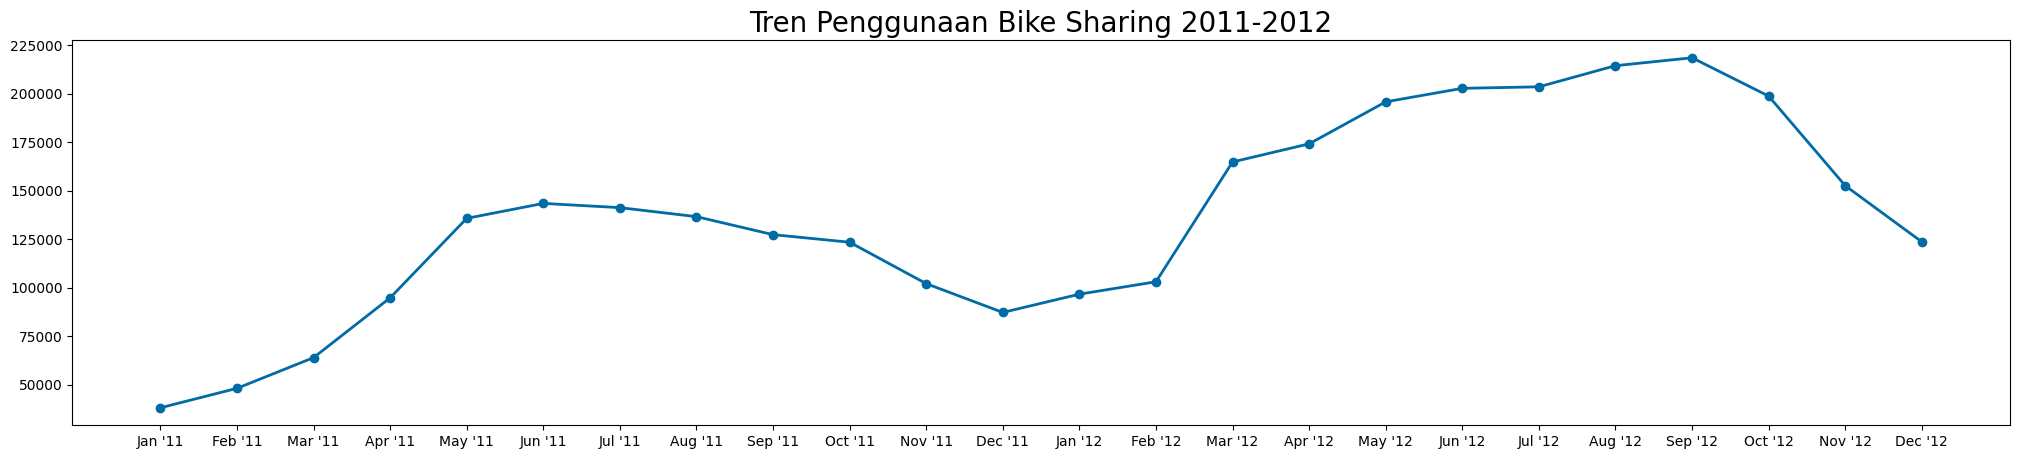

In [22]:
# Membuat grafik time-series penggunaan layanan dari tahun 2011-2012
monthly_count_df = day_df.resample(rule='ME', on='date').agg({
    "total": "sum"
})

monthly_count_df.index = monthly_count_df.index.strftime('%b \'%y')
monthly_count_df = monthly_count_df.reset_index()

monthly_count_df.head()

plt.style.use("tableau-colorblind10")

plt.figure(figsize=(25, 5)) 

plt.plot(
    monthly_count_df['date'], 
    monthly_count_df['total'], 
    linewidth=2, 
    marker='o')

plt.title("Tren Penggunaan Bike Sharing 2011-2012", loc="center", fontsize=20) 
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**- Insight -**
<br>Dari grafik di atas dapat dilihat bahwa tren penggunaan layanan *bike sharing* cenderung meningkat dari tahun 2011-2012 dengan pengunaan tertinggi di bulan September 2012. Meskipun begitu terdapat penurunan penggunaan layanan pada akhir tahun 2012. Namun, pola yang sama terjadi di tahun 2011, yaitu penurunan jumlah pengunaan ketika memasuki akhir tahun.

### Pertanyaan 2: Pada hari apa sepeda paling banyak dan paling sedikit digunakan?

C:\Users\ystkd\AppData\Local\Temp\ipykernel_10104\1529233222.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


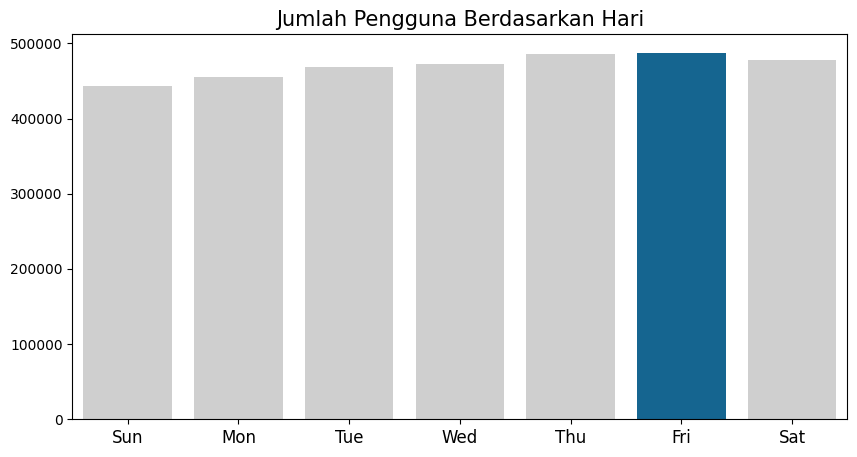

In [23]:
#Membuat grafik penggunaan layanan setiap harinya
daily_count_df = day_df.groupby("day", observed=False).total.sum().reset_index()

daily_count_df['day'] = pd.Categorical(daily_count_df['day'], ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

plt.figure(figsize=(10, 5))

colors = ["#CFCFCF", "#CFCFCF", "#CFCFCF", "#CFCFCF", "#CFCFCF", "#006BA4", "#CFCFCF"]

sns.barplot(
    y="total", 
    x="day",
    data=daily_count_df.sort_values(by="day"),
    palette=colors
)
plt.title("Jumlah Pengguna Berdasarkan Hari", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

**- Insight -**
<br>Dari grafik tersebut dapat diketahui bahwa jumlah pengguna terbanyak adalah pada hari Jum'at dan paling sedikit pada hari Minggu. Meskipun demikian, perbedaan jumlah pengguna di tiap harinya terlihat tidak begitu signifikan, terutama pada hari Jum'at dan Kamis.

### Pertanyaan 3: Pada jam berapa sepeda paling banyak dan paling sedikit digunakan?

C:\Users\ystkd\AppData\Local\Temp\ipykernel_10104\2082110816.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hourly_count_df.hour.replace((0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23),
C:\Users\ystkd\AppData\Local\Temp\ipykernel_10104\2082110816.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ystkd\AppData\Local\Temp\ipykernel_10104\208211081

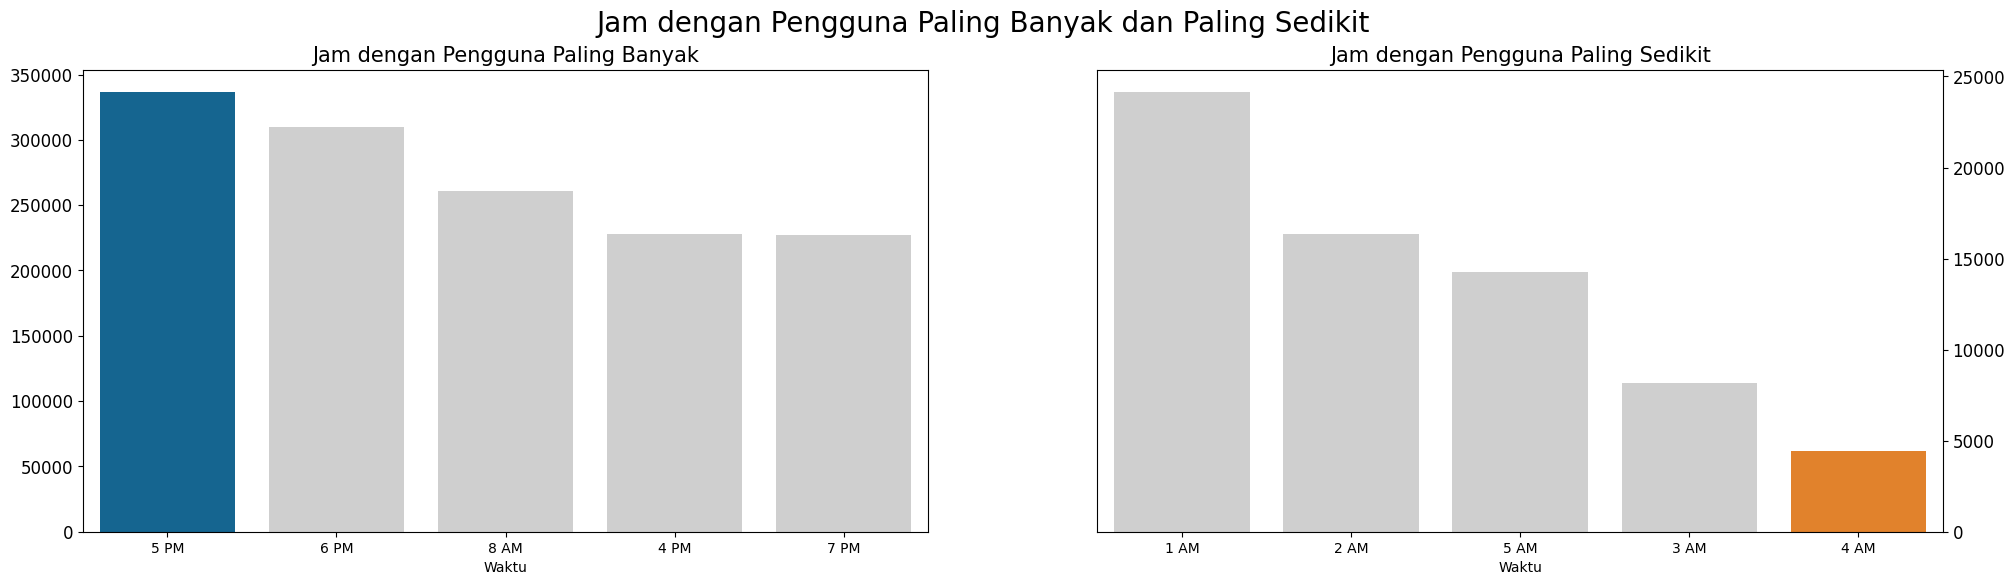

In [24]:
# Membuat grafik penggunaan layanan berdasarkan jam
hourly_count_df = hour_df.groupby('hour').total.sum().sort_values(ascending=False).reset_index()

hourly_count_df.hour.replace((0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23),
                       ('12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM',
                       '6 AM', '7 AM', '8 AM', '9 AM', '10 AM', '11 AM',
                       '12 PM', '1 PM', '2 PM', '3 PM', '4 PM', '5 PM',
                       '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM'), inplace=True)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#006BA4", "#CFCFCF", "#CFCFCF", "#CFCFCF", "#CFCFCF"]

sns.barplot(
    x="hour", 
    y="total", 
    data=hourly_count_df.head(5), 
    palette=["#006BA4", "#CFCFCF", "#CFCFCF", "#CFCFCF", "#CFCFCF"],
    ax=ax[0])

ax[0].set_ylabel(None)
ax[0].set_xlabel("Waktu")
ax[0].set_title("Jam dengan Pengguna Paling Banyak", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(
    x="hour", 
    y="total", 
    data=hourly_count_df.sort_values(by="total", ascending=True).head(5), 
    palette=["#FF800E", "#CFCFCF", "#CFCFCF", "#CFCFCF", "#CFCFCF"], 
    ax=ax[1])

ax[1].set_ylabel(None)
ax[1].set_xlabel("Waktu")
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Jam dengan Pengguna Paling Sedikit", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Jam dengan Pengguna Paling Banyak dan Paling Sedikit", fontsize=20)
plt.show()

**- Insight -**
<br>Sesuai dengan insight yang diperoleh ketika melakukan eksplorasi data, penggunaan paling banyak di jam 5 sore dan paling sedikit di jam 4 pagi.

### Pertanyaan 4: Pada musim apa sepeda paling banyak dan paling sedikit digunakan?

C:\Users\ystkd\AppData\Local\Temp\ipykernel_10104\2431492812.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


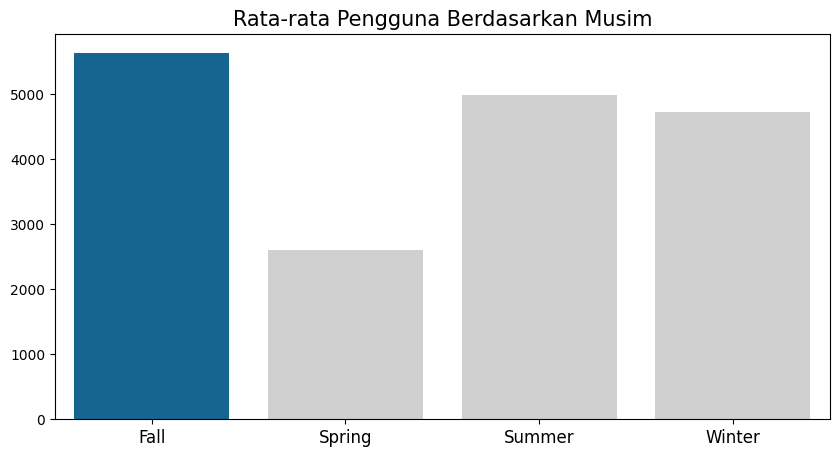

In [25]:
#Membuat grafik penggunaan layanan setiap harinya
season_count_df = day_df.groupby("season", observed=False).total.mean().reset_index()

plt.figure(figsize=(10, 5))

colors = ["#006BA4", "#CFCFCF", "#CFCFCF", "#CFCFCF"]

sns.barplot(
    y="total", 
    x="season",
    data=season_count_df,
    palette=colors
)
plt.title("Rata-rata Pengguna Berdasarkan Musim", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

**- Insight -**
<br>Sesuai dengan insight yang diperoleh ketika melakukan eksplorasi data, penggunaan terbanyak adalah ketika Fall dan paling sedikit ketika Spring.

### Pertanyaan 5: Bagaimana perbedaan penggunaan layanan pada pengguna *casual* dan *registered*?

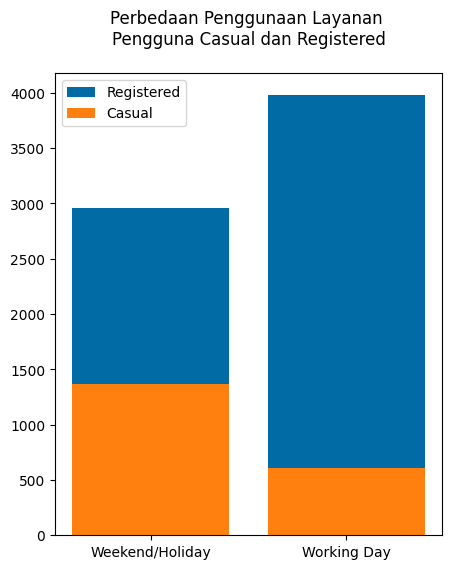

In [26]:
# Membuat grafik penggunaan layanan oleh pengguna casual dan registered
user_type_df = day_df.groupby("workingday", observed=True).agg({
    'registered': 'mean', 
    'casual': 'mean'
}).reset_index()

plt.figure(figsize=(5, 6))

plt.style.use("tableau-colorblind10")

plt.bar(
    user_type_df['workingday'],
    user_type_df['registered'],
    label='Registered'
)

plt.bar(
    user_type_df['workingday'],
    user_type_df['casual'],
    label='Casual'
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Perbedaan Penggunaan Layanan \nPengguna Casual dan Registered\n')
plt.legend()
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

**- Insight -**
<br>Jika melihat dari grafik di atas, dapat dilihat bahwa pengguna *registered* cenderung menggunakan layanan pada saat Working Day sementara pengguna *casual* cenderung menggunakan layanan ketika Weekend/Holiday.

## Analisis Lanjutan

Pada bagian ini, akan dilakukan clustering pada dataset untuk mengidentifikasi insight dari kelompok objek dengan karakteristik yang sama. Teknik clustering yang akan digunakan adalah Data Binning. Data binning merupakan teknik mengelompokkan data numerik ke dalam beberapa interval yang disebut sebagai *bin.* Kolom yang akan diolah pada tahap ini adalah kolom *'hour'* pada dataset `hour_df` dengan pembagian seperti berikut:

1. Late Night: 0 - 3
2. Early Morning: 4 - 6
3. Morning: 7 - 12
4. Afternoon: 13 - 17
5. Evening: 19 - 20
6. Night: 21 - 23

In [27]:
# Membuat kolom baru yang berisi kelompok waktu dengan nama `time_cluster`
hour_df['time_cluster'] = pd.cut(hour_df['hour'], [-1, 3, 6, 12, 17, 20, 23], 
                                 labels = ['Late Night', 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night'])

hour_df.sample(5)

,date,season,year,month,hour,day,workingday,weather,casual,registered,total,time_cluster
16672,2012-12-02,Winter,2012,Dec,11,Sun,Weekend/Holiday,Cloudy,81,274,355,Morning
1070,2011-02-17,Spring,2011,Feb,8,Thu,Working Day,Clear,18,267,285,Morning
10977,2012-04-07,Summer,2012,Apr,13,Sat,Weekend/Holiday,Clear,355,288,643,Afternoon
8588,2011-12-29,Spring,2011,Dec,15,Thu,Working Day,Cloudy,27,150,177,Afternoon
9901,2012-02-22,Spring,2012,Feb,14,Wed,Working Day,Clear,35,142,177,Afternoon


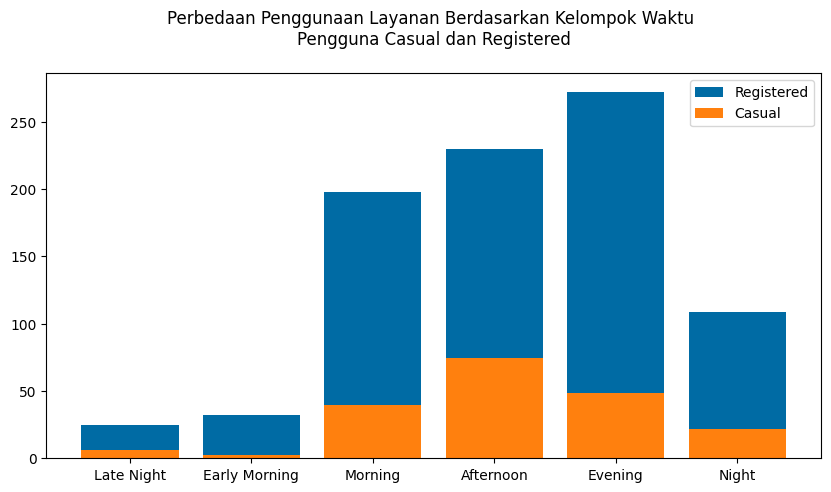

In [28]:
# Membuat grafik penggunaan layanan berdasarkan kelompok waktu oleh pengguna casual dan registered
time_cluster_count_df = hour_df.groupby("time_cluster", observed=True).agg({
    'registered': 'mean', 
    'casual': 'mean'
}).reset_index()

plt.figure(figsize=(10, 5))

plt.style.use("tableau-colorblind10")

plt.bar(
    time_cluster_count_df['time_cluster'],
    time_cluster_count_df['registered'],
    label='Registered'
)

plt.bar(
    time_cluster_count_df['time_cluster'],
    time_cluster_count_df['casual'],
    label='Casual'
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Perbedaan Penggunaan Layanan Berdasarkan Kelompok Waktu \nPengguna Casual dan Registered\n')
plt.legend()
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

**- Insight -**
<br>Dari grafik tersebut diketahui informasi tambahan mengenai perbedaan penggunaan layanan pada pengguna *casual* dan *registered*. Pengguna *casual* rata-rata menggunakan layanan pada siang hari, yaitu pada pukul 13-17. Sementara itu, pengguna *registered* rata-rata menggunakan layanan pada waktu petang, yaitu pukul 19-20.

## Conclusion

Dari proses analisis data yang telah dilakukan, dapat disimpulkan beberapa hal:
1. **Conclusion 1**: Tren penggunaan layanan *bike sharing* cenderung meningkat dari tahun 2011-2012.
2. **Conclusion 2**: Sepeda paling banyak digunakan pada hari Jum'at dan paling sedikit pada hari Minggu. Meskipun demikian, karena perbedaan yang tidak terlalu signifikan, dapat dikatakan bahwa penggunaan lebih banyak pada hari kerja.
3. **Conclusion 3**: Sepeda paling banyak digunakan pada jam 5 sore dan paling sedikit pada jam 4 pagi.
4. **Conclusion 4**: Sepeda paling banyak digunakan pada musim gugur (Fall) dan paling sedikit pada musim semi (Spring).
5. **Conclusion 5**: Pengguna *casual* cenderung menggunakan layanan pada akhir pekan atau hari libur dan pada siang hari (13-17 PM). Pengguna *registered* cenderung menggunakan layanan pada hari kerja dan pada waktu petang (19-20 PM).